In [1]:
import sys
# sys.path.append('/content/ML_Forex_Forecasting')
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.statespace.tools import diff
import pickle
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Load the Data

In [2]:
gbpchf = pd.read_csv("./GBPCHF=X.csv", parse_dates=['Date'])
gbpchf = gbpchf[['Date', 'Close']]

gold_prices = pd.read_csv("./GC=F.csv", parse_dates=['Date'])
gold_prices = gold_prices[['Date', 'Close']]
gold_prices.rename(columns = {'Close':'Gold_Price'}, inplace = True)

SSMI = pd.read_csv("./SSMI.csv", parse_dates=['Date'])
SSMI = SSMI[['Date', 'Close']]
SSMI.rename(columns = {'Close':'SSMI'}, inplace = True)

FTSE = pd.read_csv("./FTSE.csv", parse_dates=['Date'])
FTSE = FTSE[['Date', 'Close']]
FTSE.rename(columns = {'Close':'FTSE'}, inplace = True)

gbpchf = gbpchf.merge(gold_prices, on='Date')
gbpchf = gbpchf.merge(FTSE, on='Date')
gbpchf = gbpchf.merge(SSMI, on='Date')

print(f"GBP/CHF: {gbpchf.shape}")
display(gbpchf)

GBP/CHF: (246, 5)


,Date,Close,Gold_Price,FTSE,SSMI
0,2022-12-01,1.13964,1801.099976,7558.500000,11238.200195
1,2022-12-02,1.14775,1795.900024,7556.200195,11198.129883
2,2022-12-05,1.15136,1767.400024,7567.500000,11194.669922
3,2022-12-06,1.14879,1769.300049,7521.399902,11109.330078
4,2022-12-07,1.14275,1785.500000,7489.200195,11009.950195
...,...,...,...,...,...
241,2023-11-27,1.11156,2011.800049,7460.700195,10821.059570
242,2023-11-28,1.11183,2039.699951,7455.200195,10760.379883
243,2023-11-29,1.11460,2047.099976,7423.500000,10802.879883
244,2023-11-30,1.10840,2038.099976,7453.799805,10854.320313


In [8]:
from statsmodels.tsa.stattools import grangercausalitytests

max_lag = 15

test_result = grangercausalitytests(gbpchf[['Close', 'Gold_Price']], max_lag, verbose=True)

for lag in range(1, max_lag + 1):
    f_statistic = test_result[lag][0]['params_ftest'][0]
    p_value = test_result[lag][0]['params_ftest'][1]


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0013  , p=0.9712  , df_denom=242, df_num=1
ssr based chi2 test:   chi2=0.0013  , p=0.9710  , df=1
likelihood ratio test: chi2=0.0013  , p=0.9710  , df=1
parameter F test:         F=0.0013  , p=0.9712  , df_denom=242, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6443  , p=0.5259  , df_denom=239, df_num=2
ssr based chi2 test:   chi2=1.3156  , p=0.5180  , df=2
likelihood ratio test: chi2=1.3121  , p=0.5189  , df=2
parameter F test:         F=0.6443  , p=0.5259  , df_denom=239, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4996  , p=0.6829  , df_denom=236, df_num=3
ssr based chi2 test:   chi2=1.5432  , p=0.6723  , df=3
likelihood ratio test: chi2=1.5383  , p=0.6735  , df=3
parameter F test:         F=0.4996  , p=0.6829  , df_denom=236, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4377  , p=0.7813  

In [9]:
from statsmodels.tsa.stattools import grangercausalitytests

max_lag = 15

test_result = grangercausalitytests(gbpchf[['Close', 'FTSE']], max_lag, verbose=True)

for lag in range(1, max_lag + 1):
    f_statistic = test_result[lag][0]['params_ftest'][0]
    p_value = test_result[lag][0]['params_ftest'][1]


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3888  , p=0.5335  , df_denom=242, df_num=1
ssr based chi2 test:   chi2=0.3937  , p=0.5304  , df=1
likelihood ratio test: chi2=0.3933  , p=0.5305  , df=1
parameter F test:         F=0.3888  , p=0.5335  , df_denom=242, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.5079  , p=0.0315  , df_denom=239, df_num=2
ssr based chi2 test:   chi2=7.1626  , p=0.0278  , df=2
likelihood ratio test: chi2=7.0594  , p=0.0293  , df=2
parameter F test:         F=3.5079  , p=0.0315  , df_denom=239, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.2744  , p=0.0806  , df_denom=236, df_num=3
ssr based chi2 test:   chi2=7.0257  , p=0.0711  , df=3
likelihood ratio test: chi2=6.9261  , p=0.0743  , df=3
parameter F test:         F=2.2744  , p=0.0806  , df_denom=236, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.1787  , p=0.0144  

In [10]:
from statsmodels.tsa.stattools import grangercausalitytests

max_lag = 15

test_result = grangercausalitytests(gbpchf[['Close', 'SSMI']], max_lag, verbose=True)

for lag in range(1, max_lag + 1):
    f_statistic = test_result[lag][0]['params_ftest'][0]
    p_value = test_result[lag][0]['params_ftest'][1]


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3486  , p=0.2467  , df_denom=242, df_num=1
ssr based chi2 test:   chi2=1.3654  , p=0.2426  , df=1
likelihood ratio test: chi2=1.3616  , p=0.2433  , df=1
parameter F test:         F=1.3486  , p=0.2467  , df_denom=242, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7034  , p=0.4959  , df_denom=239, df_num=2
ssr based chi2 test:   chi2=1.4361  , p=0.4877  , df=2
likelihood ratio test: chi2=1.4319  , p=0.4887  , df=2
parameter F test:         F=0.7034  , p=0.4959  , df_denom=239, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5194  , p=0.6693  , df_denom=236, df_num=3
ssr based chi2 test:   chi2=1.6045  , p=0.6584  , df=3
likelihood ratio test: chi2=1.5992  , p=0.6596  , df=3
parameter F test:         F=0.5194  , p=0.6693  , df_denom=236, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5155  , p=0.7244  

In [12]:
from statsmodels.tsa.stattools import grangercausalitytests

max_lag = 15

test_result = grangercausalitytests(gbpchf[['FTSE', 'Close']], max_lag, verbose=True)

for lag in range(1, max_lag + 1):
    f_statistic = test_result[lag][0]['params_ftest'][0]
    p_value = test_result[lag][0]['params_ftest'][1]


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6463  , p=0.4222  , df_denom=242, df_num=1
ssr based chi2 test:   chi2=0.6543  , p=0.4186  , df=1
likelihood ratio test: chi2=0.6534  , p=0.4189  , df=1
parameter F test:         F=0.6463  , p=0.4222  , df_denom=242, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6608  , p=0.5174  , df_denom=239, df_num=2
ssr based chi2 test:   chi2=1.3493  , p=0.5093  , df=2
likelihood ratio test: chi2=1.3456  , p=0.5103  , df=2
parameter F test:         F=0.6608  , p=0.5174  , df_denom=239, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4696  , p=0.7037  , df_denom=236, df_num=3
ssr based chi2 test:   chi2=1.4506  , p=0.6937  , df=3
likelihood ratio test: chi2=1.4463  , p=0.6947  , df=3
parameter F test:         F=0.4696  , p=0.7037  , df_denom=236, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4324  , p=0.7852  

## Dickey-Fuller Test

In [3]:
def dickey_fuller_test(df,var):
    result = adfuller(df[var].values)
    #Extracting the values from the results:
    print(f"Dickey-Fuller test for feature: {var}")

    print('Test Statistic: %f' % result[0])

    print('p-value: %f' % result[1])

    print('Critical Values:')

    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[0] < result[4]["5%"]:
        print ("Reject H0 - Time Series is Stationary")
    else:
        print ("Failed to Reject H0 - Time Series is Non-Stationary")

In [4]:
dickey_fuller_test(gbpchf,'Close')
print("")
dickey_fuller_test(gbpchf,'Gold_Price')
print("")
dickey_fuller_test(gbpchf,'FTSE')
print("")
dickey_fuller_test(gbpchf,'SSMI')

Dickey-Fuller test for feature: Close
Test Statistic: -2.733587
p-value: 0.068404
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
Failed to Reject H0 - Time Series is Non-Stationary

Dickey-Fuller test for feature: Gold_Price
Test Statistic: -2.505662
p-value: 0.114103
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
Failed to Reject H0 - Time Series is Non-Stationary

Dickey-Fuller test for feature: FTSE
Test Statistic: -2.854658
p-value: 0.050880
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
Failed to Reject H0 - Time Series is Non-Stationary

Dickey-Fuller test for feature: SSMI
Test Statistic: -2.295345
p-value: 0.173474
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
Failed to Reject H0 - Time Series is Non-Stationary


In [5]:
# Perform differencing
diff_data = diff(gbpchf.set_index('Date'), k_diff=1)

In [6]:
dickey_fuller_test(diff_data,'Close')
print("")
dickey_fuller_test(diff_data,'Gold_Price')
print("")
dickey_fuller_test(diff_data,'FTSE')
print("")
dickey_fuller_test(diff_data,'SSMI')

Dickey-Fuller test for feature: Close
Test Statistic: -16.241438
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
Reject H0 - Time Series is Stationary

Dickey-Fuller test for feature: Gold_Price
Test Statistic: -4.460650
p-value: 0.000231
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
Reject H0 - Time Series is Stationary

Dickey-Fuller test for feature: FTSE
Test Statistic: -9.641578
p-value: 0.000000
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
Reject H0 - Time Series is Stationary

Dickey-Fuller test for feature: SSMI
Test Statistic: -15.830849
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
Reject H0 - Time Series is Stationary


# Autocorrelograms

In [7]:
def plot_autocorrelograms(df,var):
    plot_acf(df[var].dropna(),lags=20)
    plt.title(f"Autocorrelation for {var}")
    plot_pacf(df[var].dropna(),lags=20)
    plt.title(f"Partial Autocorrelation for {var}")

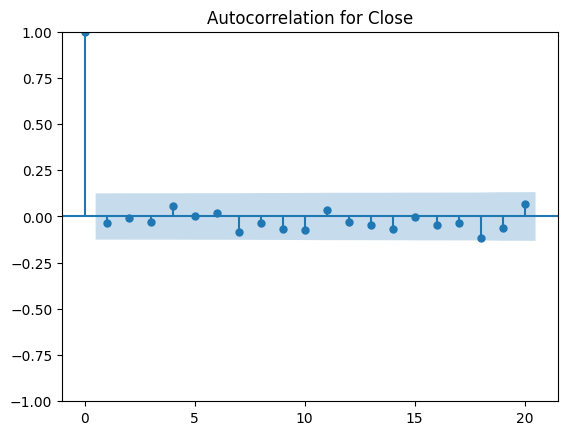

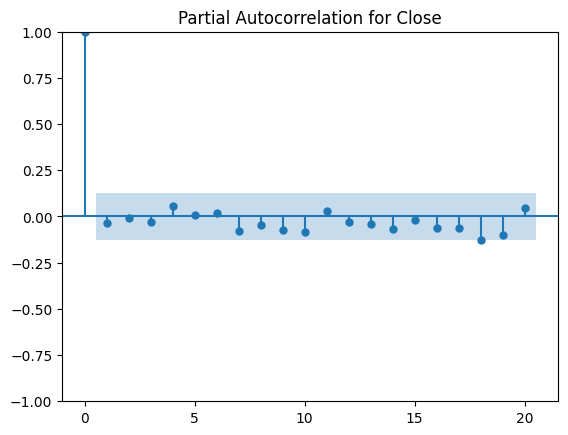

In [8]:
plot_autocorrelograms(diff_data,'Close')

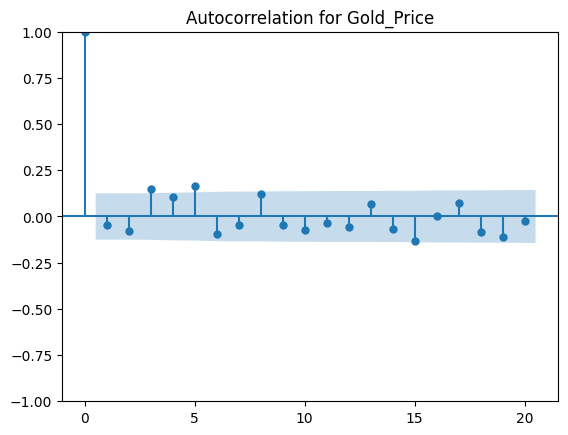

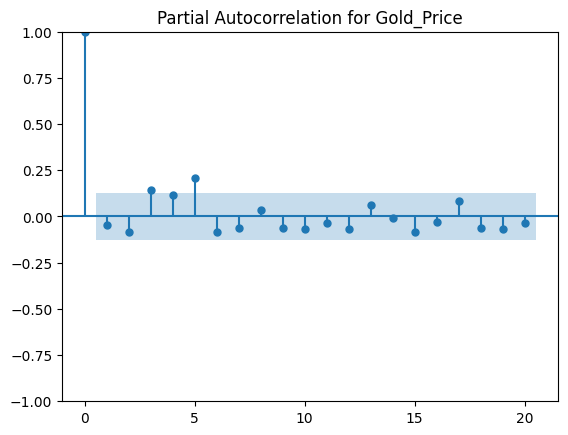

In [9]:
plot_autocorrelograms(diff_data,'Gold_Price')

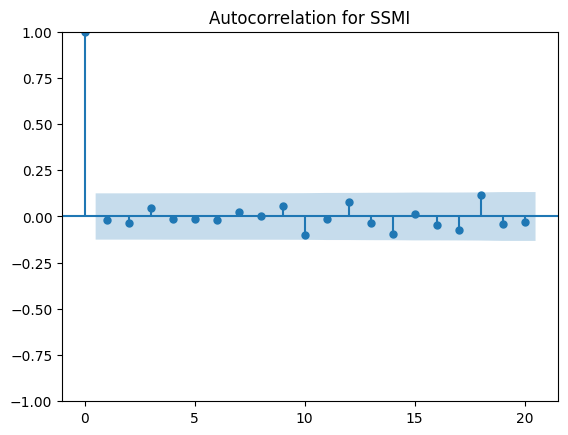

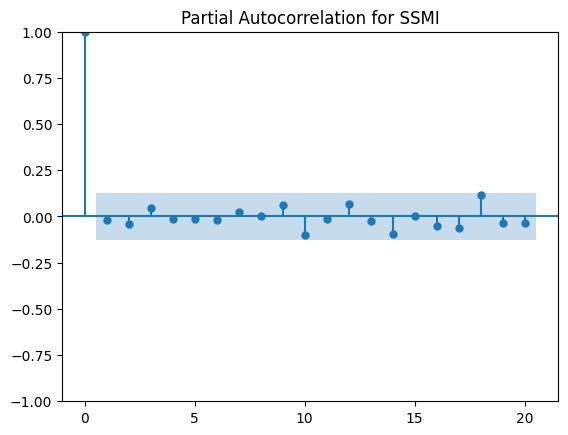

In [10]:
plot_autocorrelograms(diff_data,'SSMI')

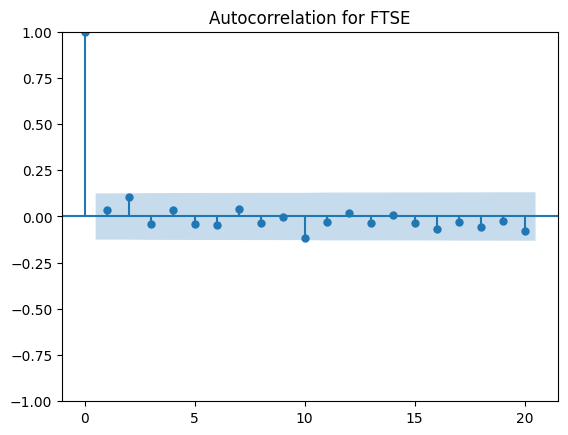

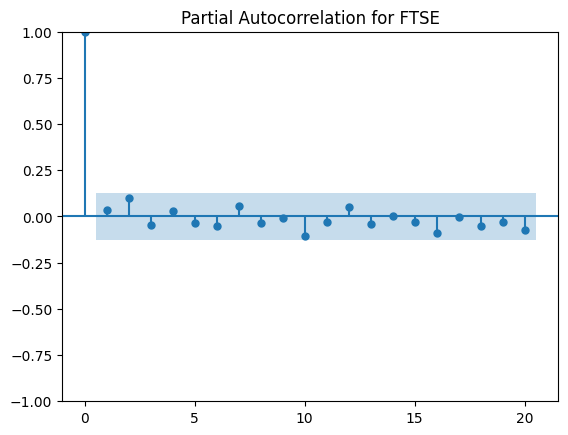

In [11]:
plot_autocorrelograms(diff_data,'FTSE')

# Model Training

In [13]:
data = gbpchf.copy()
df = data.dropna()

# train_size = int(len(df) * 0.8)
# train, test = df[:train_size], df[train_size:]
train, test = df[:-5], df[-5:]

data = train[['Close','Gold_Price','FTSE','SSMI']]

diff_data = diff(data, k_diff=1)
diff_test = diff(df[-6:], k_diff=1)

p = np.arange(1,11)
q = np.arange(1,11)
models = []
orders = []
MSEs = []
for i in p:
    for j in q:
        orders.append((i,j))
        model = VARMAX(endog=diff_data[['Close','FTSE']], order=(i,j), mle_regression = True, filter_concentrated = True, initialization='approximate_diffuse', exog=diff_data[['Gold_Price','SSMI']])
        model_fit = model.fit(disp=False)
        pred = pd.DataFrame()
        pred['prediction'] = data.iloc[-1]['Close'] + np.cumsum(model_fit.forecast(5, exog=diff_test[['FTSE','SSMI']]).reset_index(drop=True).Close)
        pred['observed'] = test.reset_index(drop=True).Close
        models.append(model_fit)
        MSEs.append(np.mean((pred['prediction'].values-pred['observed'].values)**2))

/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models

In [20]:
MSEs

[1.2243691090908583e-05,
 1.2272910432708351e-05,
 9.477224180233563e-06,
 8.685152366369222e-06,
 8.302747904746905e-06,
 8.375531807333875e-06,
 7.836615148875317e-06,
 6.664732528378301e-06,
 6.934390883517035e-06,
 6.651766061024463e-06,
 1.299153480225502e-05,
 2418.1942837885445,
 9.803511469337999e-06,
 8.924845486422403e-06,
 8.58241871730411e-06,
 9.222070661155686e-06,
 8.583471242638015e-06,
 7.3643626363596855e-06,
 7.244385136480729e-06,
 7.268015591010756e-06,
 1.3157442349607908e-05,
 1.3043887182285932e-05,
 1.2971343783393305e-05,
 1.0396312181588282e-05,
 1.0114477195757695e-05,
 1.0669648001479245e-05,
 9.815666204680743e-06,
 8.200493180282894e-06,
 8.050836838449935e-06,
 8.084181479638584e-06,
 1.060329732930065e-05,
 1.0565140674591421e-05,
 1.0563242069671596e-05,
 1.0448904443122881e-05,
 1.0567486282712567e-05,
 1.055596703690116e-05,
 9.60966790804001e-06,
 7.70998125047302e-06,
 8.760369474586103e-06,
 8.4917663906448e-06,
 1.0935992115029122e-05,
 1.1065662

In [14]:
idx = np.argmin(MSEs)
print(orders[idx])
model_fit = models[idx]

(1, 10)


/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Text(0.5, 1.0, 'MSE = 8.804515362230893e-06')

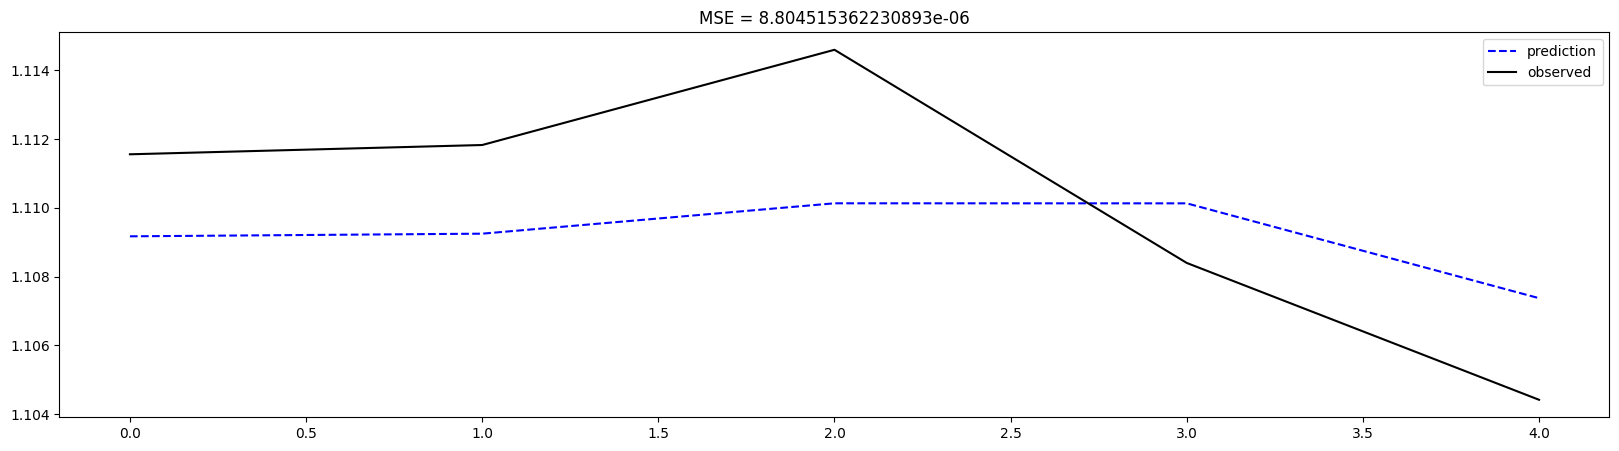

In [15]:
# plot prediction vs observed
pred = pd.DataFrame()
pred['prediction'] = data.iloc[-1]['Close'] + np.cumsum(model_fit.forecast(5, exog=diff_test[['Gold_Price','SSMI']]).reset_index(drop=True).Close)
pred['observed'] = test.reset_index(drop=True).Close

pred.plot(figsize=(20,5),title='prediction vs observed',color=['blue','black'],style=['--','-'])
plt.title(f"MSE = {np.mean((pred['prediction'].values-pred['observed'].values)**2)}")

In [16]:
print(pred)

   prediction  observed
0    1.109174   1.11156
1    1.109251   1.11183
2    1.110135   1.11460
3    1.110133   1.10840
4    1.107376   1.10442


In [17]:
# Train all the data using the best p and q parameters
diff_data_all = diff(gbpchf, k_diff=1)
model = VARMAX(endog=diff_data_all[['Close', 'FTSE']], order=orders[idx], mle_regression = True, filter_concentrated = True, initialization='approximate_diffuse', exog=diff_data_all[['Gold_Price','SSMI']])
model_fit_final = model.fit(disp=False)

/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [18]:
forecast_vals = gbpchf.iloc[-1]['Close'] + np.cumsum(model_fit_final.forecast(5, exog=diff_test[['Gold_Price','SSMI']]).reset_index(drop=True).Close)
print(forecast_vals)

0    1.102554
1    1.104257
2    1.102939
3    1.101381
4    1.099250
Name: Close, dtype: float64


/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


In [19]:
forecast_vals.values.tofile("./predictions_gbpchf.csv", sep=',')

In [ ]:
import pickle
pickle.dump(model_fit, open("./gbpchf_models/model_9_9_best.pkl","wb"))